<a href="https://colab.research.google.com/github/hyrahmaaa/Calculator-Model-Premi/blob/main/Kalkulator_Model_Premi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kalkulator Model Premi**

# Probabilitas W_t

## Hitung Nilai Fungsi Massa Peluang W_t

In [ ]:
import math
import pandas as pd
# import google.colab.files # Tidak perlu diimpor di sini, akan diimpor saat dibutuhkan

def calculate_pr_Wt_k_for_single_lambda(n, q, lambda_val, t_val):
    """
    Menghitung probabilitas Pr{Wt = k} untuk satu set parameter (n, q, lambda, t).

    Args:
        n (int): Jumlah total percobaan (max nilai k).
        q (float): Probabilitas "kegagalan" (0 <= q <= 1).
        lambda_val (float): Nilai lambda (non-negatif).
        t_val (float): Nilai waktu t (non-negatif).

    Returns:
        list: Sebuah list berisi probabilitas Pr{Wt = k} untuk k = 0 hingga n.
              Mengembalikan list probabilitas nol jika ada error dalam perhitungan e^(-lambda*t).
    """
    p = 1 - q # Probabilitas "sukses"

    probabilities = []

    # Hitung e^(-lambda * t)
    try:
        exp_lambda_t = math.exp(-lambda_val * t_val)
    except OverflowError:
        print(f"Peringatan: Nilai lambda * t ({lambda_val * t_val}) terlalu besar, menyebabkan OverflowError untuk e^(-lambda * t). Mengembalikan probabilitas 0.")
        return [0.0] * (n + 1)
    except Exception as e:
        print(f"Error saat menghitung e^(-lambda * t) untuk lambda={lambda_val}, t={t_val}: {e}")
        return [0.0] * (n + 1)

    for k in range(n + 1):
        if k < n:
            # Formula untuk k = 0, 1, 2, ..., (n-1)
            binomial_coefficient = math.comb(n, k)
            prob_k = binomial_coefficient * (q**k) * (p**(n - k)) * exp_lambda_t
        else: # k == n
            # Formula untuk k = n
            prob_k = (q**n * exp_lambda_t) + (1 - exp_lambda_t)

        probabilities.append(prob_k)

    return probabilities

def generate_probability_table(n, q, t, lambda_values_dict):
    """
    Menghasilkan tabel probabilitas Pr{Wt = k} untuk berbagai nilai lambda.

    Args:
        n (int): Jumlah total percobaan (max nilai k).
        q (float): Probabilitas "kegagalan" (0 <= q <= 1).
        t (float): Nilai waktu t (non-negatif).
        lambda_values_dict (dict): Dictionary dengan key adalah string dari nilai lambda
                                   dan value adalah nilai lambda float yang sesuai.

    Returns:
        pandas.DataFrame: Tabel probabilitas dengan kolom 'k' dan kolom untuk setiap nilai lambda.
    """
    # Basic input validation (more robust validation can be added)
    if not (isinstance(n, int) and n >= 0):
        print("Error: n harus bilangan bulat non-negatif.")
        return pd.DataFrame()
    if not (0 <= q <= 1):
        print("Error: q harus antara 0 dan 1.")
        return pd.DataFrame()
    if t < 0:
        print("Error: t harus non-negatif.")
        return pd.DataFrame()

    # Inisialisasi DataFrame dengan kolom 'k'
    df = pd.DataFrame({'k': list(range(n + 1))})

    # Iterasi untuk setiap nilai lambda yang diberikan
    for lambda_str_name, lambda_val in lambda_values_dict.items():
        if lambda_val < 0:
            print(f"Peringatan: Nilai lambda '{lambda_str_name}' adalah negatif. Kolom ini akan diisi nol.")
            df[lambda_str_name] = [0.0] * (n + 1)
            continue

        probs_for_lambda = calculate_pr_Wt_k_for_single_lambda(n, q, lambda_val, t)
        df[lambda_str_name] = probs_for_lambda

    return df

# --- Bagian Input Pengguna dan Eksekusi ---
if __name__ == "__main__":
    print("--- Generator Tabel Probabilitas Pr{Wt = k} ---")
    print("Masukkan parameter yang diperlukan:")

    try:
        # Input untuk n
        n_input = int(input("Masukkan nilai n (jumlah maksimum k, bilangan bulat non-negatif): "))
        if n_input < 0:
            raise ValueError("n harus non-negatif.")

        # Input untuk q
        q_input = float(input("Masukkan nilai q (probabilitas kegagalan, antara 0 dan 1): "))
        if not (0 <= q_input <= 1):
            raise ValueError("q harus antara 0 dan 1.")

        # Input untuk t
        t_input = float(input("Masukkan nilai t (waktu, non-negatif): "))
        if t_input < 0:
            raise ValueError("t harus non-negatif.")

        # Input untuk nilai-nilai lambda (sekarang langsung nilainya yang jadi nama kolom)
        print("\nMasukkan nilai-nilai lambda yang ingin dijadikan kolom (ketik 'selesai' untuk mengakhiri):")
        lambda_data = {}
        while True:
            lambda_input_str = input("Masukkan nilai lambda (ketik 'selesai' untuk mengakhiri): ").strip()
            if lambda_input_str.lower() == 'selesai' or not lambda_input_str:
                break

            try:
                lambda_val = float(lambda_input_str)
                # Gunakan string dari nilai lambda sebagai key/nama kolom
                lambda_data[lambda_input_str] = lambda_val
            except ValueError:
                print("Input lambda tidak valid. Harap masukkan angka.")

        if not lambda_data:
            print("Tidak ada nilai lambda yang dimasukkan. Tidak ada tabel yang akan dibuat.")
        else:
            # Panggil fungsi untuk menghasilkan tabel
            final_table = generate_probability_table(n_input, q_input, t_input, lambda_data)

            if not final_table.empty:
                print("\n--- Tabel Probabilitas Pr{Wt = k} ---")

                # Mengatur format tampilan Pandas untuk angka float di konsol
                pd.set_option('display.float_format', '{:.6g}'.format)

                # Tampilkan tabel di konsol
                print(final_table.to_string(index=False))

                print("\n--- Cek Total Probabilitas (Per Kolom) ---")
                print(final_table.drop(columns=['k']).sum().to_string(float_format='{:.6g}'.format))

                # --- Tambahan untuk mengunduh tabel ---
                print("\nApakah Anda ingin mengunduh tabel ini? (ya/tidak)")
                download_choice = input().strip().lower()

                if download_choice == 'ya':
                    file_name = "tabel_probabilitas.csv"
                    try:
                        # Menyimpan DataFrame ke CSV
                        # float_format='%.6g' memastikan format angka yang sama seperti tampilan
                        final_table.to_csv(file_name, index=False, float_format='%.6g')
                        print(f"Tabel berhasil disimpan sebagai '{file_name}' di sesi Colab.")

                        # Mengunduh file menggunakan google.colab.files
                        from google.colab import files
                        files.download(file_name)
                        print("Unduhan akan dimulai di browser Anda.")
                    except ImportError:
                        print("Modul 'google.colab.files' tidak ditemukan. Mungkin Anda tidak menjalankan ini di Google Colab.")
                    except Exception as e:
                        print(f"Gagal mengunduh tabel: {e}")
                else:
                    print("Tabel tidak diunduh.")

    except ValueError as ve:
        print(f"Input Error: {ve}")
    except Exception as e:
        print(f"Terjadi kesalahan tak terduga: {e}")

--- Generator Tabel Probabilitas Pr{Wt = k} ---
Masukkan parameter yang diperlukan:
Masukkan nilai n (jumlah maksimum k, bilangan bulat non-negatif): 10
Masukkan nilai q (probabilitas kegagalan, antara 0 dan 1): 0.016992
Masukkan nilai t (waktu, non-negatif): 1

Masukkan nilai-nilai lambda yang ingin dijadikan kolom (ketik 'selesai' untuk mengakhiri):
Masukkan nilai lambda (ketik 'selesai' untuk mengakhiri): 0.000696
Masukkan nilai lambda (ketik 'selesai' untuk mengakhiri): 0.000325
Masukkan nilai lambda (ketik 'selesai' untuk mengakhiri): 0.000128
Masukkan nilai lambda (ketik 'selesai' untuk mengakhiri): 0.000173
Masukkan nilai lambda (ketik 'selesai' untuk mengakhiri): selesai

--- Tabel Probabilitas Pr{Wt = k} ---
 k    0.000696    0.000325    0.000128    0.000173
 0    0.841915    0.842227    0.842393    0.842355
 1    0.145531    0.145585    0.145614    0.145607
 2   0.0113202   0.0113244   0.0113267   0.0113262
 3 0.000521809 0.000522003 0.000522106 0.000522082
 4 1.57847e-05 1.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unduhan akan dimulai di browser Anda.


In [ ]:
# prompt: berikan code untuk unduh requirements

!pip freeze > requirements.txt

## Grafik Nilai Fungsi Massa Peluang W_t

Silakan unggah file CSV Anda yang berisi tabel probabilitas.
Format yang diharapkan:
 - Baris pertama (header) berisi 'k' di kolom pertama, diikuti nilai lambda (contoh: 0.000696) sebagai nama kolom probabilitas.
 - Baris-baris selanjutnya berisi data 'k' dan nilai probabilitas P(Wt) yang sesuai.
----------------------------------------------------------------------------------


Saving tabel_probabilitas_Wt_sapidewasa.csv to tabel_probabilitas_Wt_sapidewasa.csv
File 'tabel_probabilitas_Wt_sapidewasa.csv' berhasil diunggah.

DataFrame yang akan digunakan untuk plotting (df.head()):
   k    0.000696    0.000325    0.000128    0.000173
0  0     0.84099    0.841303    0.841468     0.84143
1  1    0.146311    0.146366    0.146394    0.146388
2  2   0.0114545   0.0114588    0.011461   0.0114605
3  3 0.000531414 0.000531611 0.000531716 0.000531692
4  4 1.61792e-05 1.61852e-05 1.61884e-05 1.61877e-05

Nama Garis (Nilai Lambda) yang terdeteksi dari header kolom:
['0.000696', '0.000325', '0.000128', '0.000173']


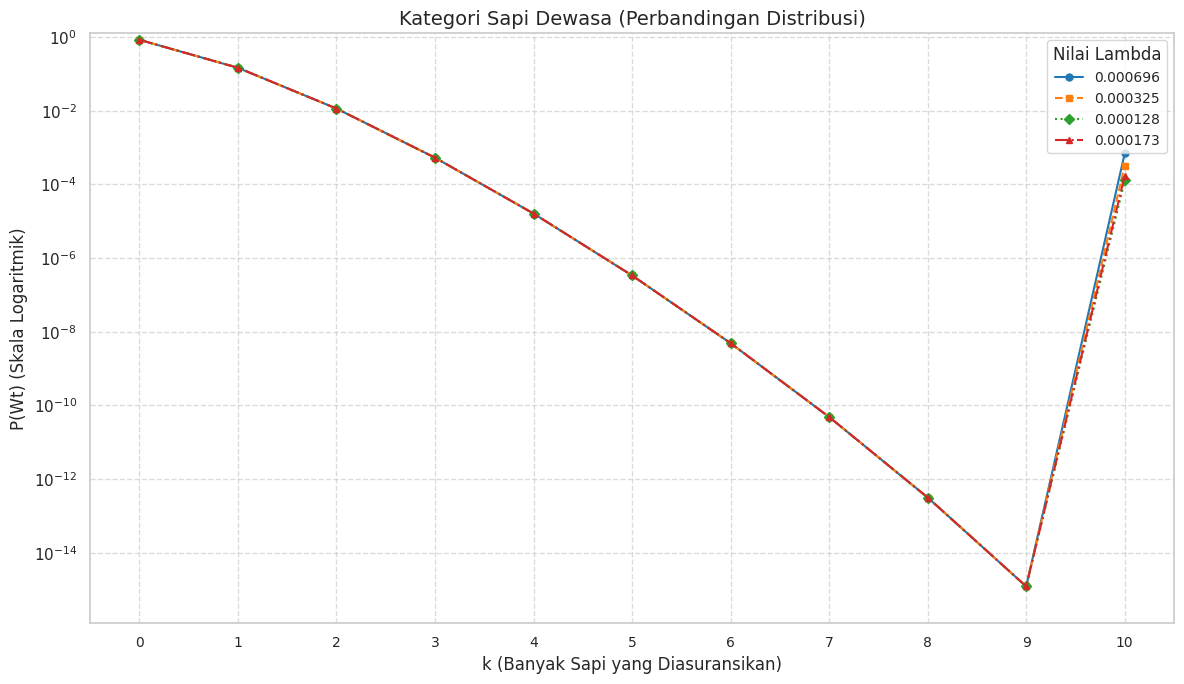


Catatan:
1. Kami telah menggunakan skala logaritmik pada sumbu Y untuk memperlihatkan perbedaan pada nilai probabilitas yang sangat kecil.
2. Setiap garis memiliki warna, gaya garis (solid, putus-putus, dll.), dan bentuk marker yang berbeda untuk mempermudah identifikasi.
3. Meskipun demikian, jika nilai probabilitas memang sangat-sangat mirip, visualisasinya mungkin tetap menunjukkan kemiripan yang tinggi.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns # Untuk warna yang kontras dan estetika plot

# Set tema plot
sns.set_theme(style="whitegrid")

# --- 1. Unggah File CSV ---
print("Silakan unggah file CSV Anda yang berisi tabel probabilitas.")
print("Format yang diharapkan:")
print(" - Baris pertama (header) berisi 'k' di kolom pertama, diikuti nilai lambda (contoh: 0.000696) sebagai nama kolom probabilitas.")
print(" - Baris-baris selanjutnya berisi data 'k' dan nilai probabilitas P(Wt) yang sesuai.")
print("----------------------------------------------------------------------------------")

from google.colab import files
uploaded = files.upload()

# Mengambil nama file yang diunggah
file_name = next(iter(uploaded))
print(f"File '{file_name}' berhasil diunggah.")

# --- 2. Baca File CSV dan Persiapkan Data untuk Plotting ---
try:
    # Membaca CSV dengan baris pertama sebagai header
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))

    # Mengidentifikasi kolom 'k' (sumbu X)
    k_column_name = df.columns[0]

    # Mengidentifikasi kolom-kolom probabilitas (sumbu Y)
    probability_columns = df.columns[1:].tolist()

    # Pastikan kolom 'k' adalah integer
    df[k_column_name] = df[k_column_name].astype(int)

    # Pastikan semua kolom probabilitas adalah numerik (float)
    for col in probability_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    print("\nDataFrame yang akan digunakan untuk plotting (df.head()):")
    print(df.head())
    print("\nNama Garis (Nilai Lambda) yang terdeteksi dari header kolom:")
    print(probability_columns)

    # --- 3. Buat Grafik Garis (Revisi untuk visibilitas) ---
    plt.figure(figsize=(12, 7)) # Mengatur ukuran grafik

    # Menggunakan palet warna yang kontras dari Seaborn
    colors = sns.color_palette("tab10", n_colors=len(probability_columns))
    # Mendefinisikan gaya garis yang berbeda untuk setiap garis
    line_styles = ['-', '--', ':', '-.'] # Solid, dashed, dotted, dash-dot
    markers = ['o', 's', 'D', '^'] # Lingkaran, kotak, berlian, segitiga (opsional)

    # Iterasi melalui setiap kolom probabilitas
    for i, column_name in enumerate(probability_columns):
        if df[column_name].isnull().all():
            print(f"Melewatkan kolom '{column_name}' karena tidak memiliki data numerik yang valid.")
            continue

        legend_label = str(column_name)

        plt.plot(df[k_column_name], df[column_name],
                 label=legend_label,
                 marker=markers[i % len(markers)], # Gunakan marker berbeda
                 markersize=5, # Ukuran marker diperbesar sedikit
                 linewidth=1.5,
                 color=colors[i % len(colors)],
                 linestyle=line_styles[i % len(line_styles)]) # Gunakan gaya garis berbeda

    # Mengatur label sumbu dan judul grafik
    plt.xlabel('k (Banyak Sapi yang Diasuransikan)', fontsize=12)
    plt.ylabel('P(Wt) (Skala Logaritmik)', fontsize=12) # Sesuaikan label sumbu Y
    plt.title('Kategori Sapi Dewasa (Perbandingan Distribusi)', fontsize=14)

    # Menampilkan legenda
    plt.legend(title="Nilai Lambda", loc='upper right', fontsize=10, title_fontsize=12)

    # Mengatur tanda centang (ticks) di sumbu X
    if not df[k_column_name].empty:
        plt.xticks(df[k_column_name].unique(), fontsize=10)
    else:
        plt.xticks(range(0, 11), fontsize=10)

    # --- PENTING: Mengubah skala sumbu Y menjadi logaritmik ---
    # Ini akan sangat membantu melihat perbedaan pada nilai-nilai yang sangat kecil.
    plt.yscale('log')

    # Menyesuaikan batas Y untuk skala log, agar tidak ada 0 atau nilai negatif
    # Cari nilai probabilitas terkecil yang BUKAN nol atau NaN
    min_prob_non_zero = df[probability_columns].replace(0, pd.NA).min().min()
    if pd.isna(min_prob_non_zero) or min_prob_non_zero <= 0:
        # Jika semua data 0 atau NaN, set batas bawah log ke nilai yang sangat kecil
        plt.ylim(bottom=1e-15, top=1.0)
    else:
        # Mulai sedikit di bawah nilai non-nol terkecil, dan akhiri sedikit di atas nilai maksimum
        plt.ylim(bottom=min_prob_non_zero * 0.1, top=df[probability_columns].max().max() * 1.5)


    # Menampilkan grid (penting untuk skala log, 'which="both"' untuk ticks mayor & minor)
    plt.grid(True, linestyle='--', alpha=0.7, which="both")

    # Menyesuaikan tata letak agar semua elemen pas
    plt.tight_layout()

    # Tampilkan grafik
    plt.show()

    print("\nCatatan:")
    print("1. Kami telah menggunakan skala logaritmik pada sumbu Y untuk memperlihatkan perbedaan pada nilai probabilitas yang sangat kecil.")
    print("2. Setiap garis memiliki warna, gaya garis (solid, putus-putus, dll.), dan bentuk marker yang berbeda untuk mempermudah identifikasi.")
    print("3. Meskipun demikian, jika nilai probabilitas memang sangat-sangat mirip, visualisasinya mungkin tetap menunjukkan kemiripan yang tinggi.")

except Exception as e:
    print(f"\nTerjadi kesalahan saat membaca atau memplot data: {e}")
    print("Mohon periksa kembali format file CSV Anda. Pastikan:")
    print("1. Baris pertama (header) berisi 'k' di kolom pertama, diikuti nilai lambda (angka) sebagai nama kolom.")
    print("2. Semua nilai numerik (k dan probabilitas) diformat dengan benar (gunakan titik '.' sebagai pemisah desimal).")
    print(f"Detail error: {e}")

# Hitung Premi Average

## Kalkulator

In [ ]:
import math

# --- Fungsi Pembantu (Helper Functions) ---

def combinations(n, k):
    """
    Menghitung kombinasi C(n, k) = n! / (k! * (n-k)!)
    Menggunakan rumus iteratif untuk efisiensi dan menghindari overflow factorial
    untuk n yang besar.
    """
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    # Ambil nilai k yang lebih kecil untuk mengurangi iterasi
    if k > n // 2:
        k = n - k

    res = 1
    for i in range(k):
        res = res * (n - i) // (i + 1)
    return res

# --- Fungsi Sesi 1: Menghitung 'a', E[Wt(d,u)], dan STANDAR DEVIASI Wt(d,u) ---

def calculate_a(lambda_val, t_val):
    """
    Menghitung nilai 'a' = exp(-lambda * t).
    """
    return math.exp(-lambda_val * t_val)

def calculate_E_Wt_and_StdDev_Wt(a_val, n, d, u, q, p, alpha_val):
    """
    Menghitung E[Wt(d,u)] dan StdDev[Wt(d,u)] (Standar Deviasi) berdasarkan rumus yang diberikan.
    """

    sum_ell_term = 0
    sum_ell_sq_term = 0
    upper_bound_ell = (u - 1) - d

    if upper_bound_ell >= 1:
        for ell in range(1, upper_bound_ell + 1):
            if d + ell > n:
                continue
            binom_val = combinations(n, d + ell)
            term_E = ell * binom_val * (q**(d + ell)) * (p**(n - d - ell))
            sum_ell_term += term_E
            term_Var_sq = (ell**2) * binom_val * (q**(d + ell)) * (p**(n - d - ell))
            sum_ell_sq_term += term_Var_sq

    sum_i_term = 0
    if u <= n:
        for i in range(u, n + 1):
            if i > n:
                continue
            binom_val_i = combinations(n, i)
            term_i = binom_val_i * (q**i) * (p**(n - i))
            sum_i_term += term_i

    E_Wt_d_u = a_val * sum_ell_term + alpha_val * (u - d) * (a_val * sum_i_term + (1 - a_val))

    # Ini adalah bagian E[X^2]
    term_for_E_X_sq = a_val * sum_ell_sq_term + (alpha_val**2) * ((u - d)**2) * (a_val * sum_i_term + (1 - a_val))

    # Menghitung TRUE Variansi: Var[X] = E[X^2] - (E[X])^2
    true_variance_Wt_d_u = term_for_E_X_sq - (E_Wt_d_u**2)

    # Mengambil akar kuadrat untuk mendapatkan STANDAR DEVIASI
    if true_variance_Wt_d_u < 0:
        print("\nPeringatan: Variansi (sebelum diakar) yang dihitung negatif. Ini mungkin karena presisi floating point.")
        print("Menggunakan nilai absolut untuk akar kuadrat.")
        std_dev_Wt_d_u = math.sqrt(abs(true_variance_Wt_d_u))
    else:
        std_dev_Wt_d_u = math.sqrt(true_variance_Wt_d_u)

    return E_Wt_d_u, std_dev_Wt_d_u

# --- Fungsi Sesi 2: Menghitung P_bar_I ---

def calculate_PI_bar(rho, eta, QT, n, E_Wt_val, StdDev_Wt_val): # Parameter diubah ke StdDev_Wt_val
    """
    Menghitung P_bar_I berdasarkan E[Wt(d,u)], StdDev[Wt(d,u)], dan parameter lainnya.
    Catatan: StdDev_Wt_val sudah merupakan standar deviasi, jadi tidak perlu diakar lagi.
    """
    denominator = (1 - QT) * n

    if denominator == 0:
        return "ERROR: Pembagi (1 - QT) * n tidak boleh nol. Periksa nilai QT dan n."

    # Langsung gunakan StdDev_Wt_val karena sudah diakar di fungsi sebelumnya
    numerator = (1 + rho + eta) * E_Wt_val + StdDev_Wt_val

    PI_bar = numerator / denominator
    return PI_bar

# --- Fungsi Sesi 3: Menghitung P_TOTAL ---
def calculate_P_TOTAL(PI_bar_val, n_val, P_price):
    """
    Menghitung P_TOTAL = PI_bar * n * P.
    """
    return PI_bar_val * n_val * P_price

# --- Alur Utama Kalkulator 3-Sesi ---

def run_calculator_three_stages():
    print("=====================================================")
    print("        Kalkulator Multi-Sesi untuk Asuransi Sapi")
    print("      (Revisi: Variansi kini adalah Standar Deviasi)")
    print("=====================================================")
    print("\n--- Sesi 1: Input untuk menghitung E[Wt(d,u)] dan StdDev[Wt(d,u)] ---")
    print("-----------------------------------------------------")

    # Input untuk 'a'
    try:
        lambda_val = float(input("Masukkan nilai Lambda (λ): "))
        t_val = float(input("Masukkan nilai t: "))
    except ValueError:
        print("Input tidak valid. Harap masukkan angka.")
        return

    # Input untuk E[Wt] dan StdDev[Wt]
    try:
        n = int(input("Masukkan nilai n (jumlah sapi total): "))
        d = int(input("Masukkan nilai d: "))
        u = int(input("Masukkan nilai u: "))
        q = float(input("Masukkan nilai q (probabilitas kematian/kegagalan, 0-1): "))
        p = 1 - q # Otomatis hitung p dari q
        alpha_val = float(input("Masukkan nilai Alpha (α): "))
    except ValueError:
        print("Input tidak valid. Harap masukkan angka untuk probabilitas atau bilangan bulat untuk jumlah.")
        return

    # Validasi dasar
    if not (0 <= q <= 1):
        print("ERROR: Nilai q harus antara 0 dan 1.")
        return
    if n <= 0:
        print("ERROR: Nilai n harus bilangan bulat positif.")
        return
    if not (0 <= d <= n and 0 <= u <= n):
        print("ERROR: Nilai d dan u harus berada dalam rentang [0, n].")
        return
    if u < d:
        print("Peringatan: Biasanya u >= d. Lanjutkan dengan hati-hati.")

    # Hitung 'a'
    a_calculated = calculate_a(lambda_val, t_val)
    print(f"\nNilai 'a' (e^(-λt)) yang dihitung: {a_calculated:.8f}")

    # Hitung E_Wt dan StdDev_Wt
    print("\nMelakukan perhitungan E[Wt(d,u)] dan StdDev[Wt(d,u)]...")
    E_Wt_result, StdDev_Wt_result = calculate_E_Wt_and_StdDev_Wt(a_calculated, n, d, u, q, p, alpha_val)

    print("\n=====================================================")
    print("                 OUTPUT SESI 1")
    print("=====================================================")
    print(f"Nilai Ekspektasi (E[Wt(d,u)]): {E_Wt_result:.8f}")
    print(f"Nilai Standar Deviasi (StdDev[Wt(d,u)]): {StdDev_Wt_result:.8f}") # Perubahan label output
    print("-----------------------------------------------------")

    # Pastikan output sesi 1 adalah angka valid sebelum lanjut
    if isinstance(E_Wt_result, str) or isinstance(StdDev_Wt_result, str): # Perubahan variabel
        print("Tidak dapat melanjutkan ke Sesi 2 karena ada error di Sesi 1.")
        return

    print("\nTekan Enter untuk melanjutkan ke Sesi 2...")
    input() # Menunggu pengguna menekan Enter

    # --- Sesi 2: Menghitung P_bar_I ---
    print("\n=====================================================")
    print("          Sesi 2: Input untuk P_bar_I")
    print("=====================================================")
    print("\n--- Input Tambahan ---")
    print("----------------------")

    try:
        rho = float(input("Masukkan nilai Rho (ρ): "))
        eta = float(input("Masukkan nilai Eta (η): "))
        QT = float(input("Masukkan nilai QT: "))
    except ValueError:
        print("Input tidak valid. Harap masukkan angka.")
        return

    # Validasi dasar untuk QT
    if not (0 <= QT <= 1):
        print("ERROR: Nilai QT harus antara 0 dan 1.")
        return

    # Hitung P_bar_I
    print("\nMelakukan perhitungan P_bar_I...")
    # Passing StdDev_Wt_result, bukan Var_Wt_result
    PI_bar_result = calculate_PI_bar(rho, eta, QT, n, E_Wt_result, StdDev_Wt_result)

    # Cek jika ada error dari fungsi perhitungan
    if isinstance(PI_bar_result, str):
        print(PI_bar_result) # Akan mencetak pesan ERROR dari fungsi
        return

    print("\n=====================================================")
    print("                 OUTPUT SESI 2")
    print("=====================================================")
    print(f"Nilai P_bar_I: {PI_bar_result:.8f}")
    print("-----------------------------------------------------")

    print("\nTekan Enter untuk melanjutkan ke Sesi 3...")
    input() # Menunggu pengguna menekan Enter

    # --- Sesi 3: Menghitung P_TOTAL ---
    print("\n=====================================================")
    print("          Sesi 3: Input untuk P_TOTAL")
    print("=====================================================")
    print("\n--- Input Tambahan ---")
    print("----------------------")

    try:
        P_price = float(input("Masukkan nilai P (Harga Sapi): ")) # Input baru untuk harga sapi
    except ValueError:
        print("Input tidak valid. Harap masukkan angka.")
        return

    # Hitung P_TOTAL
    print("\nMelakukan perhitungan P_TOTAL...")
    P_TOTAL_result = calculate_P_TOTAL(PI_bar_result, n, P_price)

    print("\n=====================================================")
    print("                 OUTPUT AKHIR")
    print("=====================================================")
    print(f"Nilai P_TOTAL: {P_TOTAL_result:.8f}")
    print("=====================================================")

# Jalankan kalkulator
if __name__ == "__main__":
    run_calculator_three_stages()

        Kalkulator Multi-Sesi untuk Asuransi Sapi
      (Revisi: Variansi kini adalah Standar Deviasi)

--- Sesi 1: Input untuk menghitung E[Wt(d,u)] dan StdDev[Wt(d,u)] ---
-----------------------------------------------------
Masukkan nilai Lambda (λ): 0.000696
Masukkan nilai t: 1
Masukkan nilai n (jumlah sapi total): 10
Masukkan nilai d: 0
Masukkan nilai u: 10
Masukkan nilai q (probabilitas kematian/kegagalan, 0-1): 0.016992
Masukkan nilai Alpha (α): 0.20

Nilai 'a' (e^(-λt)) yang dihitung: 0.99930424

Melakukan perhitungan E[Wt(d,u)] dan StdDev[Wt(d,u)]...

                 OUTPUT SESI 1
Nilai Ekspektasi (E[Wt(d,u)]): 0.17119329
Nilai Standar Deviasi (StdDev[Wt(d,u)]): 0.41139411
-----------------------------------------------------

Tekan Enter untuk melanjutkan ke Sesi 2...
